In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Importing dataset

In [2]:
data = pd.read_csv("50_Startups.csv")

In [3]:
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#Exploratory Data Analysis

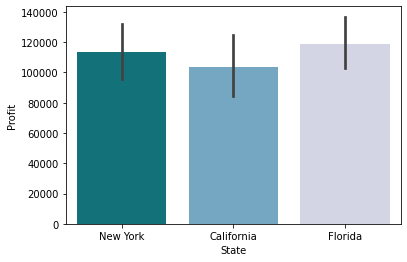

In [5]:
sns.barplot(x='State',y='Profit',data=data, palette="PuBuGn_r")

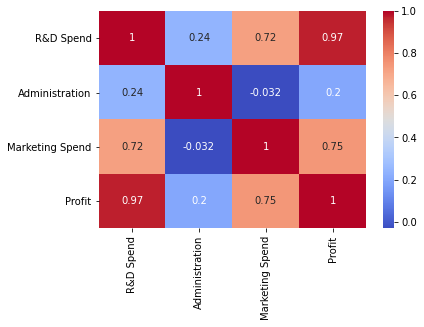

In [6]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

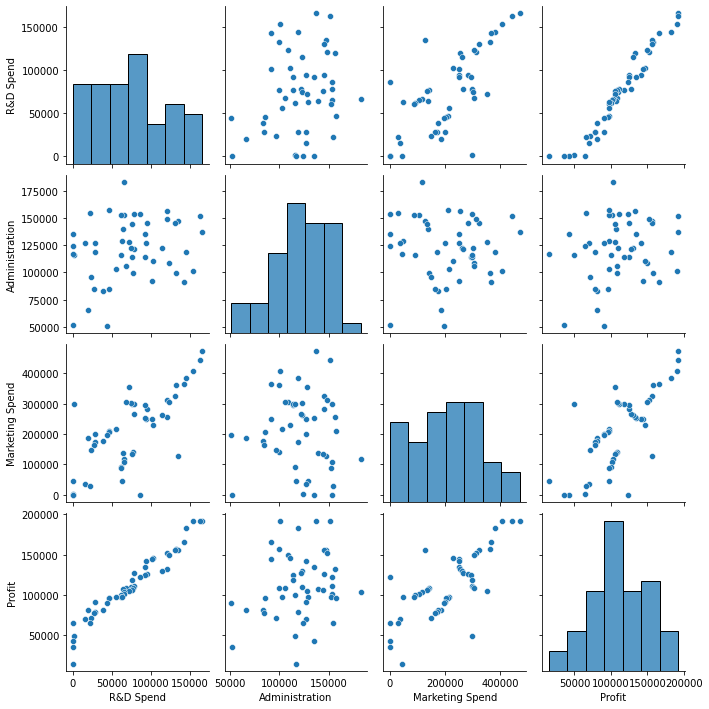

In [7]:
sns.pairplot(data)

#X,Y split

In [8]:
X = data.iloc[:,:-1].values
Y = data['Profit'].values
print(X)
print(Y)
print(type(X),type(Y))

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

#One Hot Encoding 

In [11]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
print(type(X_train),type(X_test),type(Y_train),type(Y_test))

(40, 6) (10, 6) (40,) (10,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


#Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [15]:
r2_score(Y_test, Y_pred)

0.9347068473282515

#Ridge

In [16]:
from sklearn.linear_model import Ridge
regressor2 = Ridge(alpha=1.0)
regressor2.fit(X_train, Y_train)
Y_pred = regressor2.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[103094.5  103282.38]
 [132592.11 144259.4 ]
 [132546.03 146121.95]
 [ 72059.54  77798.83]
 [178632.24 191050.39]
 [116079.57 105008.31]
 [ 67792.62  81229.06]
 [ 98741.36  97483.56]
 [114039.48 110352.25]
 [168020.48 166187.94]]


In [17]:
r2_score(Y_test, Y_pred)

0.9351576443668745

#Lasso

In [18]:
from sklearn.linear_model import Lasso
regressor3 = Lasso(alpha=0.1)
regressor3.fit(X_train, Y_train)
Y_pred = regressor3.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[103015.6  103282.38]
 [132582.36 144259.4 ]
 [132448.24 146121.95]
 [ 71976.52  77798.83]
 [178537.97 191050.39]
 [116160.8  105008.31]
 [ 67851.36  81229.06]
 [ 98791.45  97483.56]
 [113969.79 110352.25]
 [167921.58 166187.94]]


In [19]:
r2_score(Y_test, Y_pred)

0.93470921439364

#Support Vector machine

In [20]:
from sklearn.svm import SVR
regressor4 = SVR(kernel='linear')
regressor4.fit(X_train, Y_train)
Y_pred = regressor4.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[120340.57 103282.38]
 [130852.49 144259.4 ]
 [134813.01 146121.95]
 [ 75177.63  77798.83]
 [175964.07 191050.39]
 [122571.22 105008.31]
 [ 66754.53  81229.06]
 [109477.08  97483.56]
 [120835.48 110352.25]
 [164351.58 166187.94]]


In [21]:
r2_score(Y_test, Y_pred)

0.8742528560882514